In [7]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [9]:
maindir = "../small_output/"
dr = xr.open_dataarray(maindir+'plume01_entropy_all.nc',decode_times=False)
dr = dr/dr.isel(time=0) # normalize by initial condition

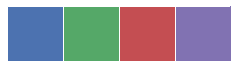

In [10]:
palette = sns.color_palette()[0:4]
sns.palplot(palette)

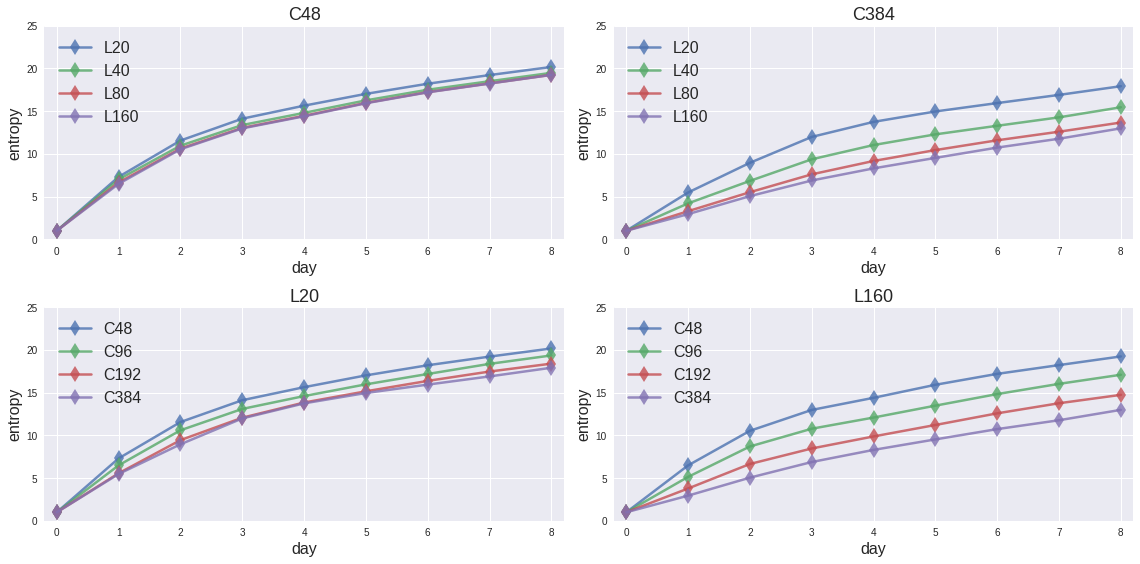

In [15]:
Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

titlesize, labelsize = [18,16]
fig, axes = plt.subplots(2,2,figsize=[16,8])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylabel('entropy',fontsize=labelsize);ax.set_xlabel('day',fontsize=labelsize)
    ax.set_ylim([0,25]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=2)

for i,Hres in enumerate(Hres_list[0:4:3]):
    ax = axes[0][i]
    ax.set_title(label='C{0}'.format(Hres),fontsize=titlesize)
    
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='L{0}'.format(Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)
        
for i,Vres in enumerate(Vres_list[0:4:3]):
    ax = axes[1][i]
    ax.set_title(label='L{0}'.format(Vres),fontsize=titlesize)
    
    for j,Hres in enumerate(Hres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}'.format(Hres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)        

fig.tight_layout()
fig.savefig('entropy_trend.png',dpi=200)

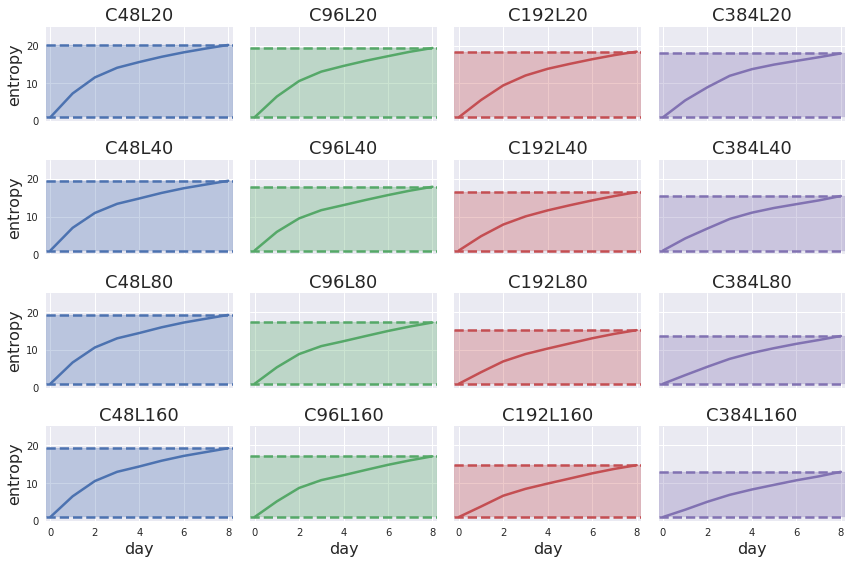

In [15]:
fig, axes = plt.subplots(4,4,figsize=[12,8])

color_list = palette

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        ax = axes[j][i]
        color = color_list[i]
        
        dr_temp = dr.sel(Hres=Hres,Vres=Vres)
        ax.plot(dr_temp,label='C{0}L{1}'.format(Hres,Vres),
                linestyle='-',linewidth=linewidth,color=color)
        ax.axhline(dr_temp.isel(time=-1),linewidth=linewidth,linestyle='--',color=color)
        ax.axhline(dr_temp.isel(time=0),linewidth=linewidth,linestyle='--',color=color)
        ax.axhspan(dr_temp.isel(time=0),dr_temp.isel(time=-1), alpha=0.3,color=color)
        
        
        ax.set_ylim([0,25]);ax.set_xlim([-0.2,8.2])

        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=titlesize)
        
        if Hres == 48:
            ax.set_ylabel('entropy',fontsize=labelsize)
        else:
            ax.yaxis.set_ticklabels([])
            
        if Vres == 160:
            ax.set_xlabel('day',fontsize=labelsize)
        else:
            ax.xaxis.set_ticklabels([])
            
        
fig.tight_layout()
#fig.savefig('entropy_4x4plot.png',dpi=200)